# Comparing *Chlamydomonas reinhardtii* movement in multiple chambers

Below is R code for anlayzing the movement of the algae *Chlamydomonas reinhardtii* in two types of small chambers: 384 well plates (**384**) or novel microchambers (**micro**). Cells were imaged and tracked using CellProfiler, generating the data file 'measurements_Cells.csv' used here. 

For more information see the publication [Microchamber slide design for cell confinement during imaging](research.arcadiascience.com/pub/resource-microchamber-slide).

## Loading and cleaning data

Load packages

In [5]:
options(stringsAsFactors=F);
suppressPackageStartupMessages(library(vioplot))

Load data (change the location in this to match wherever you have the 'measurements_Cells.csv' file saved)

In [1]:
dat = read.csv('measurements_Cells.csv.gz')

Add unique id column (to be able to grab individual tracks as a function of sample, hour, well and object ID)

In [7]:
dat$id = paste(dat$Metadata_Sample, dat$Metadata_hour, dat$Metadata_Well, dat$TrackObjects_Label_10, sep = '_')

Spit data into unique tracks

In [8]:
tracks = split(dat, dat$id)

## Comparing movement variables

### Integrated distance

Extract total distance travelled per track

In [9]:
distance = unlist(lapply(tracks, function(x) x$TrackObjects_IntegratedDistance_10[nrow(x)]))

Combine into 384 vs microchamber

In [10]:
distance = split(distance, unlist(lapply(strsplit(names(distance), "_"), function(v){v[1]})))

Compare statistically with Kruskal-Wallis test

In [11]:
k = kruskal.test(distance)
print(k)


	Kruskal-Wallis rank sum test

data:  distance
Kruskal-Wallis chi-squared = 1198.9, df = 1, p-value < 2.2e-16



Compare means

In [12]:
lapply(distance, function(x) mean(x))

$`384`
[1] 19.34775

$micro
[1] 25.59502

Plot

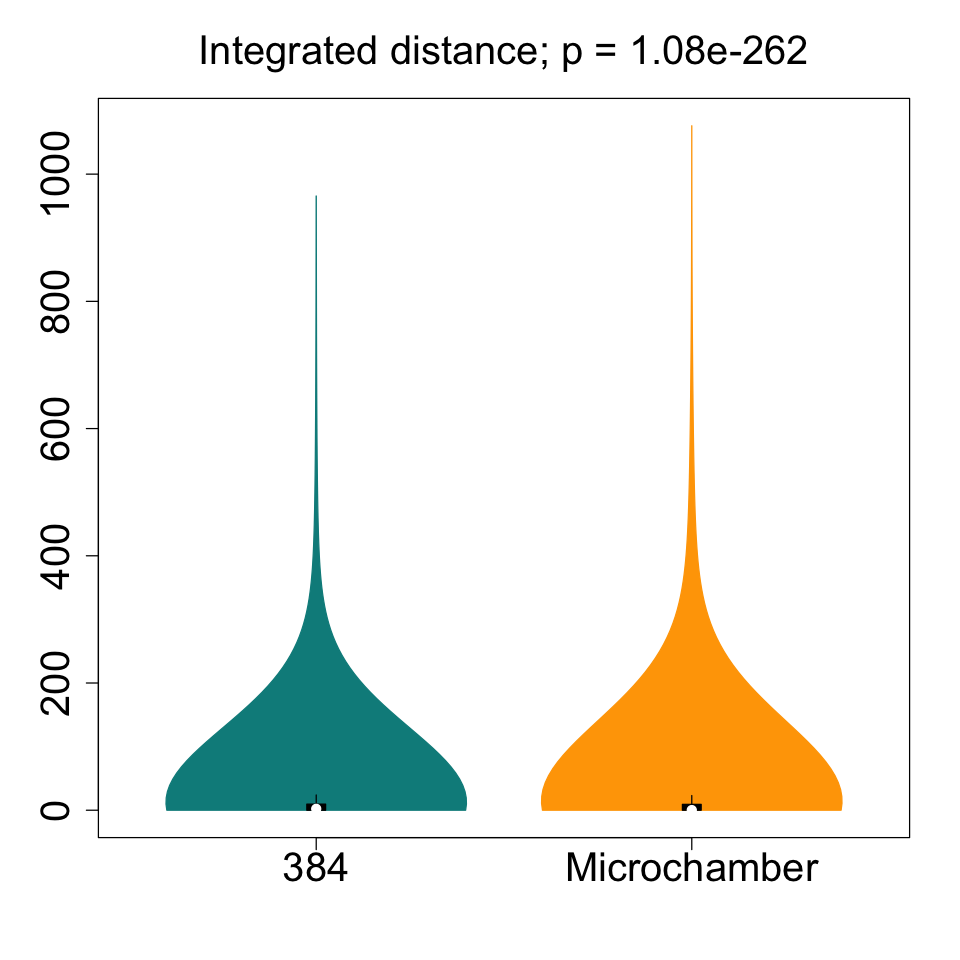

In [13]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(distance[[1]], 
                 distance[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Integrated distance;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

### Distance travelled

Extract distance travelled

In [14]:
trav = unlist(lapply(tracks, function(x) x$TrackObjects_DistanceTraveled_10))

Combine into 384 vs. microchamber

In [15]:
trav = split(trav, unlist(lapply(strsplit(names(trav), "_"), function(v){v[1]})))

Compare with Kruskal-Wallis test

In [16]:
k = kruskal.test(trav)
print(k)


	Kruskal-Wallis rank sum test

data:  trav
Kruskal-Wallis chi-squared = 31604, df = 1, p-value < 2.2e-16



Compare means

In [17]:
lapply(trav, function(x) mean(x))

$`384`
[1] 1.225786

$micro
[1] 1.410823

Plot

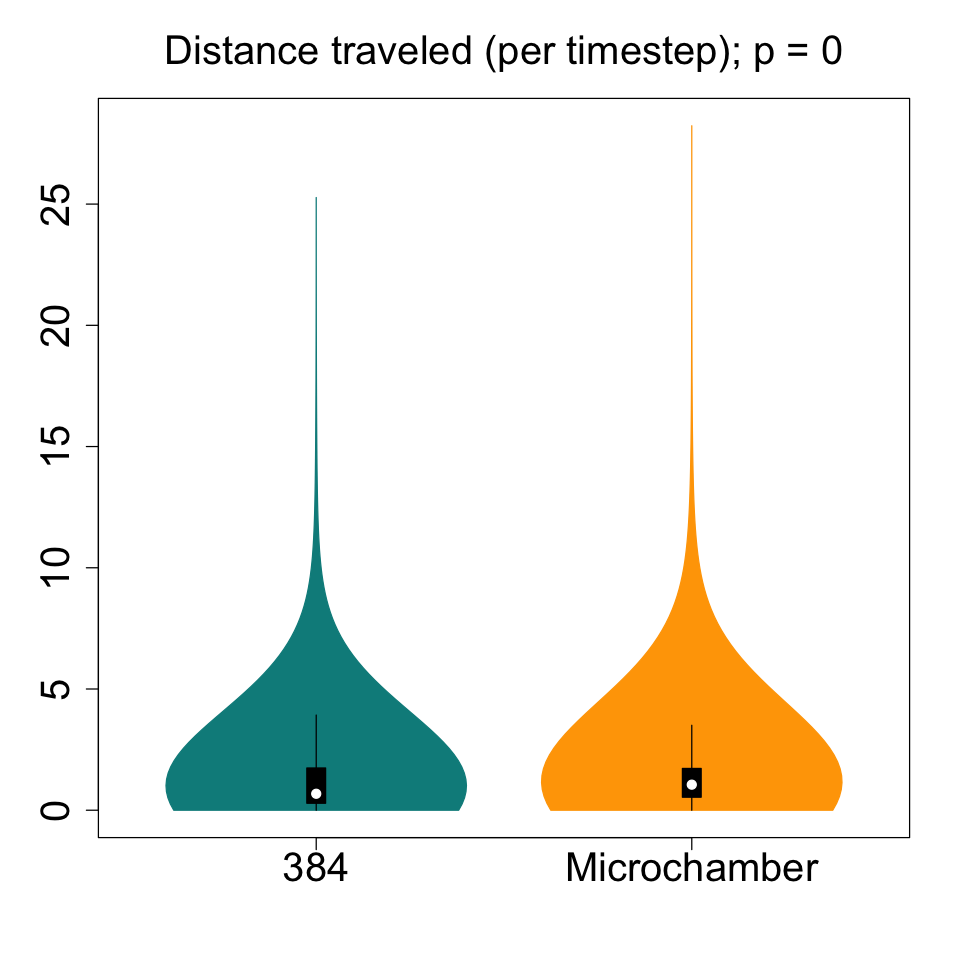

In [18]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(trav[[1]], 
                 trav[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Distance traveled (per timestep);', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

### Linearity

Extract linearity

In [19]:
lin = unlist(lapply(tracks, function(x) x$TrackObjects_Linearity_10))

Combine into 384 vs. microchamber

In [20]:
lin = split(lin, unlist(lapply(strsplit(names(lin), "_"), function(v){v[1]})))

Compare with kruskal-wallis test

In [21]:
k = kruskal.test(lin)
print(k)


	Kruskal-Wallis rank sum test

data:  lin
Kruskal-Wallis chi-squared = 137538, df = 1, p-value < 2.2e-16



Compare means

In [22]:
lapply(lin, function(x) mean(x, na.rm = TRUE))

$`384`
[1] 0.4222936

$micro
[1] 0.5959036

Plot

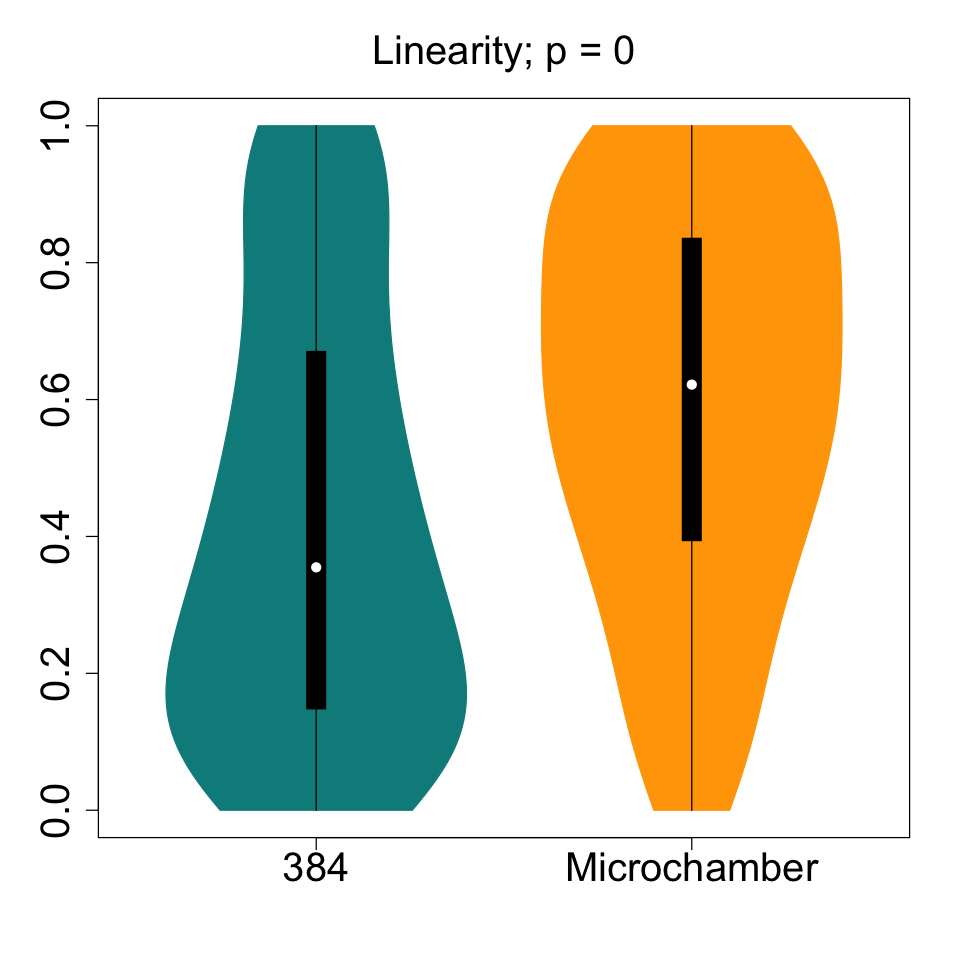

In [23]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(na.omit(lin[[1]]), 
                 na.omit(lin[[2]]),
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Linearity;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

### Lifetime

Extract lifetime

In [24]:
life = unlist(lapply(tracks, function(x) x$TrackObjects_Lifetime_10[nrow(x)]))

Combine into 384 vs. microchamber

In [25]:
life = split(life, unlist(lapply(strsplit(names(life), "_"), function(v){v[1]})))

Compare with kruskal-wallis test

In [26]:
k = kruskal.test(life)
print(k)


	Kruskal-Wallis rank sum test

data:  life
Kruskal-Wallis chi-squared = 3360.2, df = 1, p-value < 2.2e-16



Compare means

In [27]:
lapply(life, function(x) mean(x, na.rm = TRUE))

$`384`
[1] 17.76246

$micro
[1] 20.12285

Plot

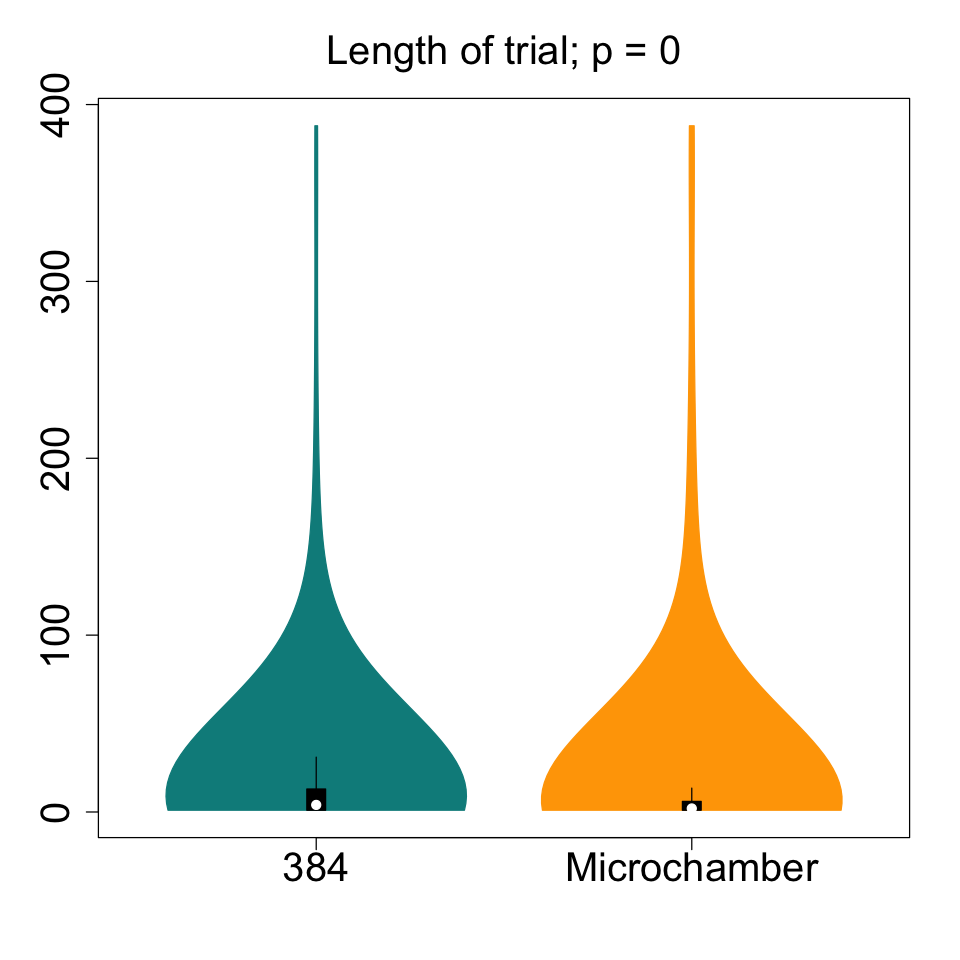

In [28]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(life[[1]], 
                 life[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Length of trial;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

### Swimming speed

Extract swimming speed (distance traveled multiplied by imaging resolution (1.2930) and divided by frame interval (0.025))

In [29]:
speed = unlist(lapply(tracks, function(x) (x$TrackObjects_DistanceTraveled_10*1.2930)/0.025))

Filter speed

In [30]:
speed = speed[speed>0]
speed = speed[speed<150]

Combine into 384 vs. microchamber

In [31]:
speed = split(speed, unlist(lapply(strsplit(names(speed), "_"), function(v){v[1]})))

Compare with kruskal-wallis test

In [32]:
k = kruskal.test(speed)
print(k)


	Kruskal-Wallis rank sum test

data:  speed
Kruskal-Wallis chi-squared = 49805, df = 1, p-value < 2.2e-16



Compare means

In [33]:
lapply(speed, function(x) mean(x, na.rm = TRUE))

$`384`
[1] 47.3215

$micro
[1] 56.99232

Plot

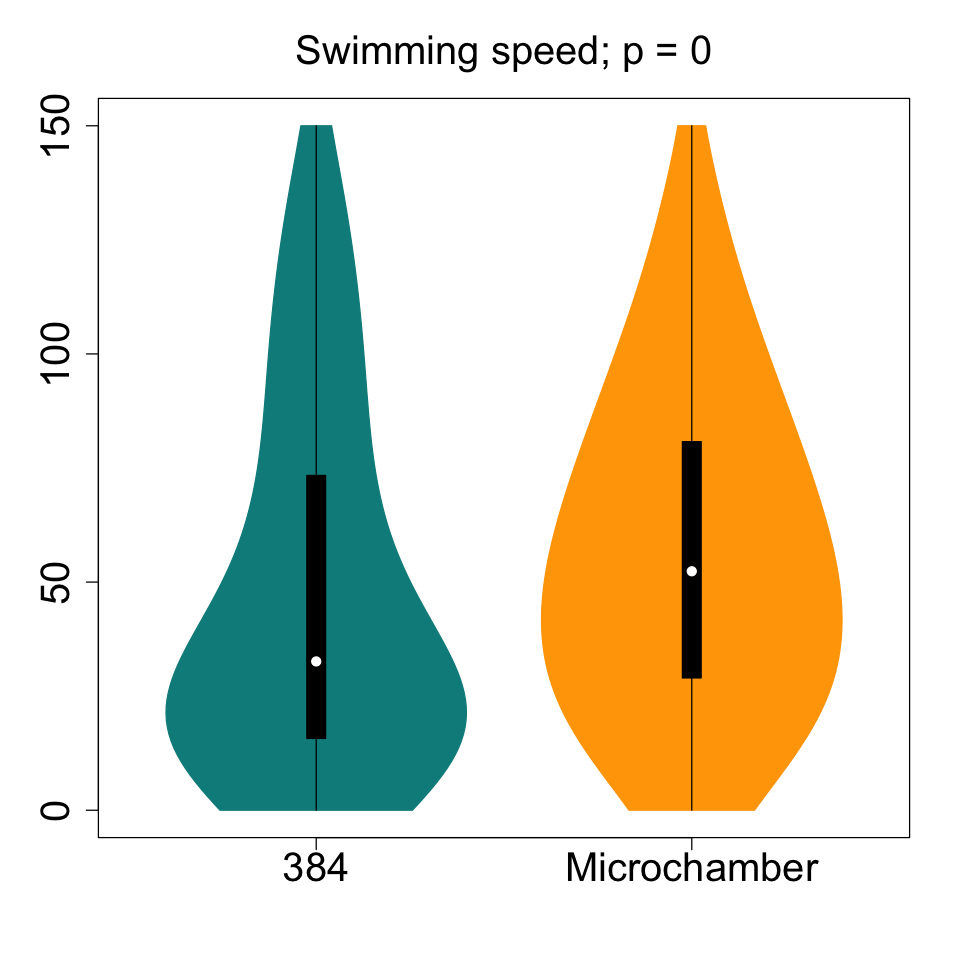

In [34]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(speed[[1]], 
                 speed[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Swimming speed;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

### Hardware and versions

All analyses were run on an Apple M1 Max MacBook Pro using macOS Monterey (v12.2.1).<br> All analyses were done using R v4.1.3.<br> 
R package versions:<br> 
vioplot v0.3.7